In [66]:
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [67]:
df=pd.read_csv('COVID.CSV')

In [68]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [69]:
df.shape

(23688, 5)

In [70]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [71]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [72]:
print(df['Country'].value_counts())

Cameroon                    126
Cyprus                      126
South Africa                126
Bangladesh                  126
Jamaica                     126
                           ... 
Colombia                    126
Central African Republic    126
Lesotho                     126
Tajikistan                  126
Comoros                     126
Name: Country, Length: 188, dtype: int64


In [73]:
#all 188 countries has 126 days data

In [74]:
df.apply(lambda x : len(x.unique()))

Date          126
Country       188
Confirmed    5308
Recovered    3303
Deaths       1768
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [76]:
df.loc[:,'Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [77]:
corr=df.corr()

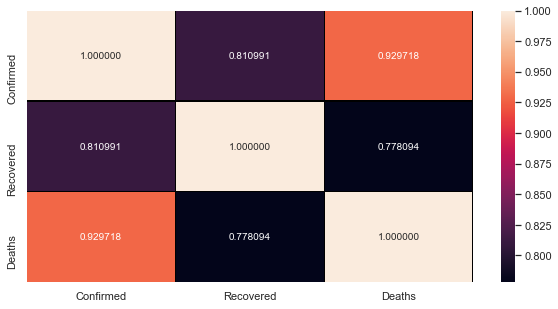

In [78]:
df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='2f')

In [79]:
#we can observe that 92% correlation between death and confirmed cases while 77.8% correlation between no of recovered cases and deaths 

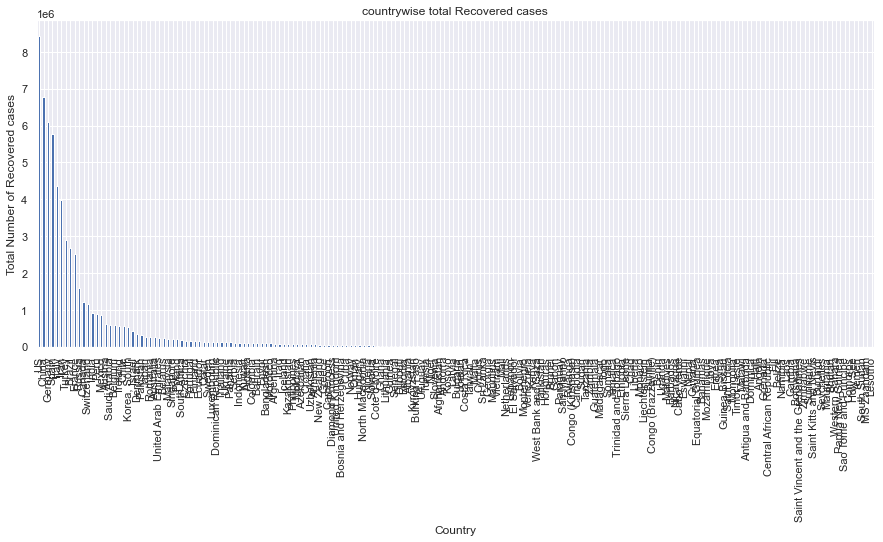

Country
US             8428678
China          6776464
Germany        6102898
Spain          5770271
Italy          4354815
                ...   
Holy See            98
Yemen               92
South Sudan         73
MS Zaandam           0
Lesotho              0
Name: Recovered, Length: 188, dtype: int64


In [80]:
plt.subplots(figsize = (15, 6))
recovered_cases = df.groupby('Country').sum()
pt = recovered_cases['Recovered'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Country')
ax.set_ylabel('Total Number of Recovered cases')
ax.set_title('countrywise total Recovered cases')
plt.show()
print(pt)

In [81]:
#we cannot conclude anything from above fgure,but with statistical report we can understand number of recovered cases is highest in USA then China follwed by germany,sain and italy respectively 

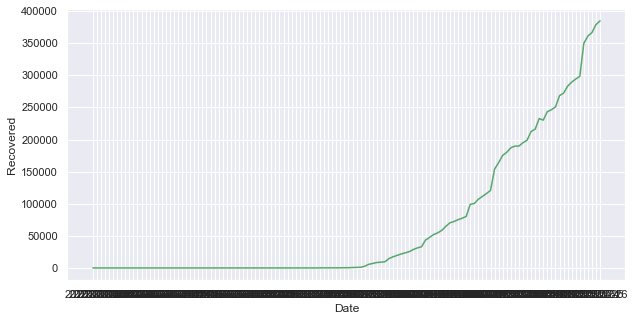

In [82]:
US=df[df.Country=="US"]

sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="Date",y="Recovered",data=US,color='g')

plt.show()

In [83]:
#death and confirmed cases have steap increase as dates are moving forward but whileobserving recovered caases we can see their
#is fluctuations which shows poor health care conditions 

In [84]:
Confirmed_cases = df.groupby('Country').sum()
pt =Confirmed_cases['Confirmed'].sort_values(ascending = False)

print(pt)

Country
US                  57098767
Italy               11896347
Spain               11890691
United Kingdom       9150537
Germany              9046257
                      ...   
Bhutan                   608
MS Zaandam               512
Papua New Guinea         359
Western Sahara           307
Lesotho                   19
Name: Confirmed, Length: 188, dtype: int64


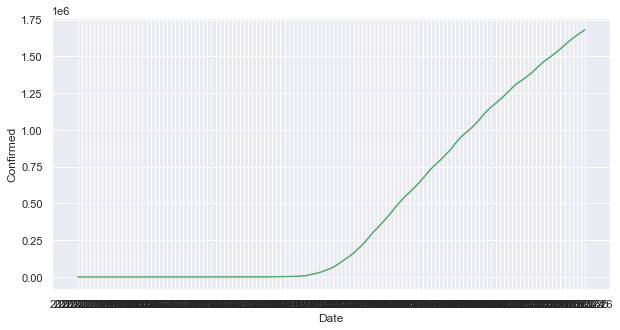

In [85]:
US=df[df.Country=="US"]

sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="Date",y="Confirmed",data=US,color='g')

plt.show()

In [86]:
Death_cases = df.groupby('Country').sum()
pt =Death_cases['Deaths'].sort_values(ascending = False)

print(pt)

Country
US                                  3221969
Italy                               1568276
United Kingdom                      1329006
Spain                               1302010
France                              1209634
                                     ...   
Saint Vincent and the Grenadines          0
Fiji                                      0
Mongolia                                  0
Eritrea                                   0
Seychelles                                0
Name: Deaths, Length: 188, dtype: int64


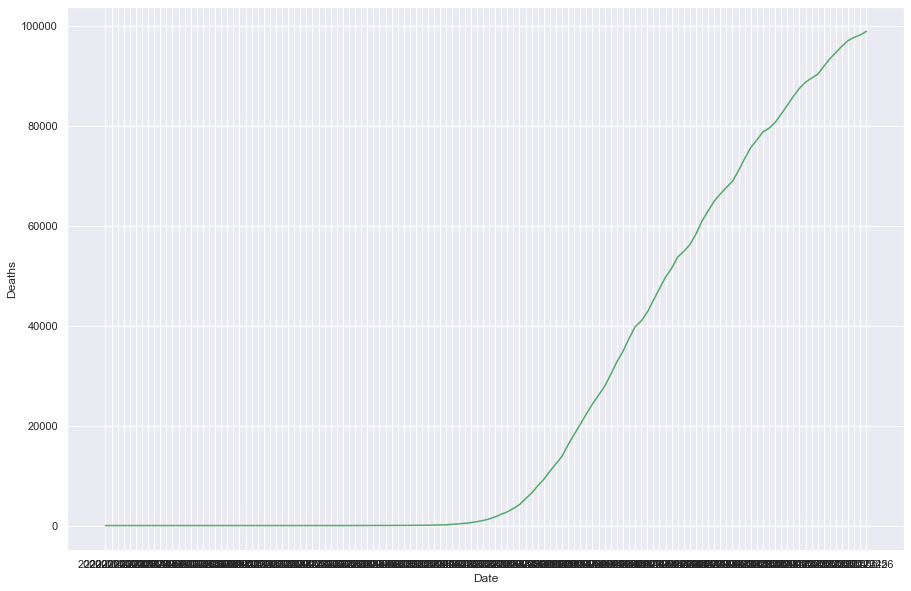

In [87]:
US=df[df.Country=="US"]

sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Deaths",data=US,color='g')

plt.show()

In [88]:
#death cases are found highest in USA followed by italy,UK,Spain and France


In [89]:
confirmed_cases = df.groupby('Date').sum()
pt =confirmed_cases['Confirmed'].sort_values(ascending = False)

print(pt)

Date
2020-05-26    5589626
2020-05-25    5495061
2020-05-24    5407613
2020-05-23    5310362
2020-05-22    5210817
               ...   
2020-01-26       2118
2020-01-25       1434
2020-01-24        941
2020-01-23        654
2020-01-22        555
Name: Confirmed, Length: 126, dtype: int64


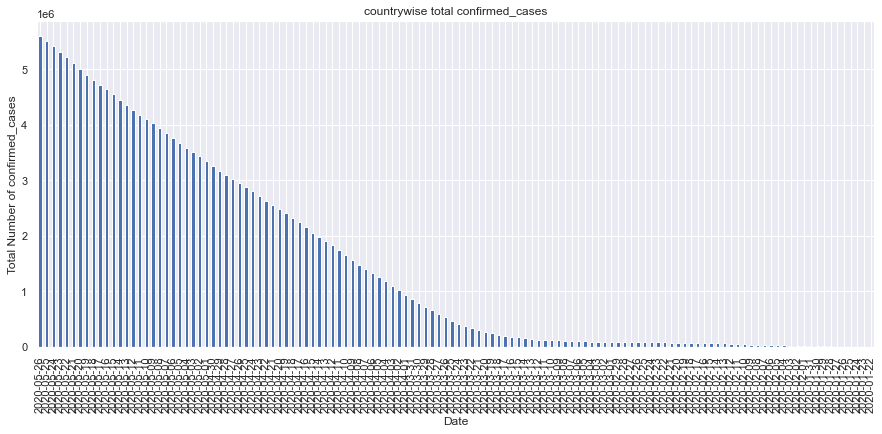

Date
2020-05-26    5589626
2020-05-25    5495061
2020-05-24    5407613
2020-05-23    5310362
2020-05-22    5210817
               ...   
2020-01-26       2118
2020-01-25       1434
2020-01-24        941
2020-01-23        654
2020-01-22        555
Name: Confirmed, Length: 126, dtype: int64


In [90]:
plt.subplots(figsize = (15, 6))
confirmed_cases = df.groupby('Date').sum()
pt = confirmed_cases['Confirmed'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Date')
ax.set_ylabel('Total Number of confirmed_cases')
ax.set_title('countrywise total confirmed_cases')
plt.show()
print(pt)

In [91]:
#Fom statistical report we can understand number of confirmed cases was in peak highest in month of nay,the figure shows cases were negligable in month of jan and feb
#which gradually started increasing and reached peak on 26/5/2020=5589626

In [92]:
#as we know US has highest hisghest recovery rate and confirmed cases lets analyse US data

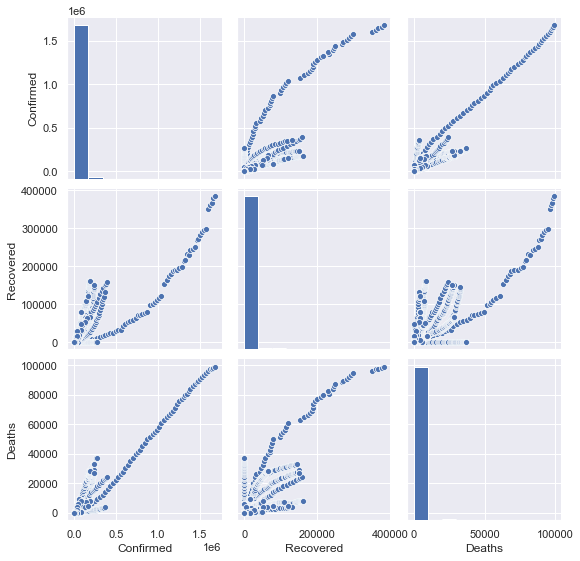

In [93]:
sns.pairplot(df)

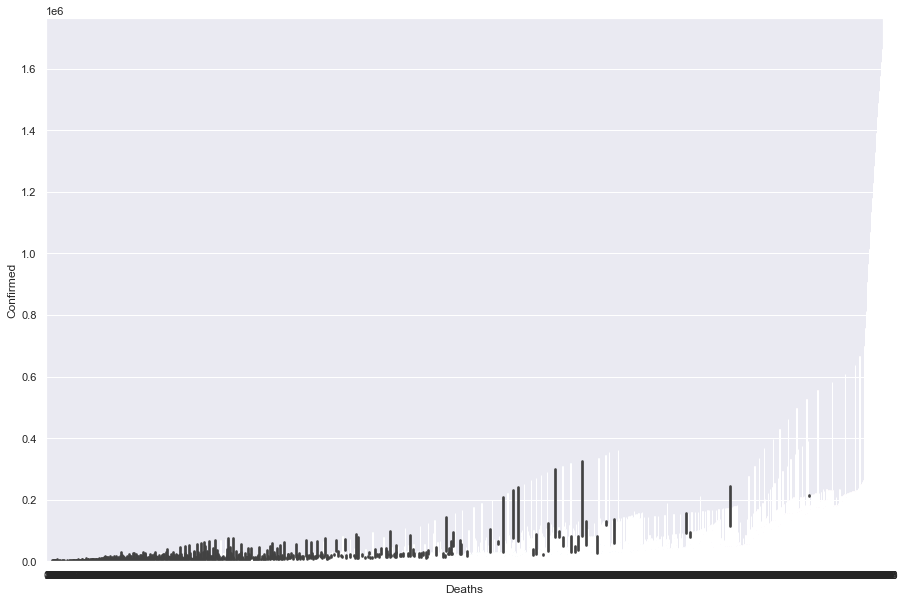

In [94]:
sns.barplot(y='Confirmed',x='Deaths',data=df)

In [95]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Country'], dtype='object')

In [96]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [97]:
df.tail(20)

,Date,Country,Confirmed,Recovered,Deaths
23668,2020-05-26,Thailand,3045,2929,57
23669,2020-05-26,Timor-Leste,24,24,0
23670,2020-05-26,Togo,391,177,13
23671,2020-05-26,Trinidad and Tobago,116,108,8
23672,2020-05-26,Tunisia,1051,929,48
23673,2020-05-26,Turkey,158762,121507,4397
23674,2020-05-26,US,1680913,384902,98913
23675,2020-05-26,Uganda,253,69,0
23676,2020-05-26,Ukraine,21584,7575,644
23677,2020-05-26,United Arab Emirates,31086,15982,253


In [98]:
#this data shows 26th may month of 2020 was the last updated data into this dataset

In [99]:
da=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=da.dt.strftime("%Y%m%d").astype(int)

In [100]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x=df.iloc[:,1].values
df.iloc[:,1]=le.fit_transform(x.astype(str))

In [101]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,20200122,0,0,0,0
1,20200122,1,0,0,0
2,20200122,2,0,0,0
3,20200122,3,0,0,0
4,20200122,4,0,0,0


In [102]:
#since we will need only int datatype to make predictions we convert date format

In [103]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split


In [104]:
x.shape,y.shape

((23688, 4), (23688,))

In [105]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
         9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
        11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
        13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
        13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
        14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
        14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
        14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
        15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
        15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
        15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
        15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
        15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
        15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
      

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=0)


NameError: name 'x_train' is not defined

In [107]:
new_df=df[(z<3).all(axis=1)]
new_df

,Date,Country,Confirmed,Recovered,Deaths
0,20200122,0,0,0,0
1,20200122,1,0,0,0
2,20200122,2,0,0,0
3,20200122,3,0,0,0
4,20200122,4,0,0,0
...,...,...,...,...,...
23683,20200526,183,429,365,3
23684,20200526,184,9,6,1
23685,20200526,185,249,10,49
23686,20200526,186,920,336,7


In [108]:
new_df.shape

(23177, 5)

In [109]:
df.shape

(23688, 5)

In [110]:
percentage_loss=((23688-23177)/23688)*100
print(percentage_loss)

2.157210401891253


In [111]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date         203.0
Country       93.5
Confirmed    730.0
Recovered    123.0
Deaths        13.0
dtype: float64


In [112]:
new_df2=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]

In [113]:
new_df2

,Date,Country,Confirmed,Recovered,Deaths
0,20200122,0,0,0,0
1,20200122,1,0,0,0
2,20200122,2,0,0,0
3,20200122,3,0,0,0
4,20200122,4,0,0,0
...,...,...,...,...,...
23675,20200526,175,253,69,0
23681,20200526,181,1211,302,11
23682,20200526,182,327,272,0
23684,20200526,184,9,6,1


In [114]:
percentage_loss=((23688-17913 )/23688)*100
print(percentage_loss)

24.379432624113477


In [115]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.79845234, -1.72286214, -0.13641539, -0.17049719],
       [-1.79845234, -1.70443581, -0.13641539, -0.17049719],
       [-1.79845234, -1.68600948, -0.13641539, -0.17049719],
       ...,
       [ 1.50177902,  1.68600948, -0.13215314, -0.16983681],
       [ 1.50177902,  1.70443581, -0.12066732, -0.1483084 ],
       [ 1.50177902,  1.72286214, -0.13545681, -0.16884624]])

In [116]:
y=le.fit_transform(y)

In [117]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [118]:
from sklearn.model_selection import train_test_split
x = new_df[['Date','Country','Confirmed','Recovered']]
y = new_df['Deaths']

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [120]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [121]:
max_r_score=0
for r_state in range (10,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)

max r2 score corresponding to:- 80 is 0.6371827547727036


In [122]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=2,scoring="r2").mean()

0.5299140300985643

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)


In [124]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x00000288348AB9D0> (           Date  Country  Confirmed  Recovered
17931  20200426       71        996        208
10049  20200315       85      24747       2335
22642  20200521       82       3877       2483
16002  20200416       22         15          0
14278  20200406      178      52279        287
...         ...      ...        ...        ...
14402  20200407      114       1056         40
8725   20200308       77          7          0
5405   20200219      141          0          0
3148   20200207      140          2          0
14831  20200409      167         25          5

[4636 rows x 4 columns], array([  43.05358157, 1262.88382965,  172.28356893, ...,  -19.50137369,
        -18.45135144,  -36.52499827]))
RMSE is : 411.19844859540467


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.20) 


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [127]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(20,100))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 20}


In [128]:
ls=Lasso(alpha=10,random_state=20)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- 53.07118328330523
R2_score is:- 63.718384072108044


At cv:- 3
Cross validation score is :- 46.46485170402428
R2_score is:- 63.718384072108044


At cv:- 4
Cross validation score is :- 37.96524053019038
R2_score is:- 63.718384072108044


At cv:- 5
Cross validation score is :- 27.13985930210243
R2_score is:- 63.718384072108044


At cv:- 6
Cross validation score is :- 26.007890850991355
R2_score is:- 63.718384072108044


At cv:- 7
Cross validation score is :- 18.343741398008287
R2_score is:- 63.718384072108044


At cv:- 8
Cross validation score is :- 15.152984263514416
R2_score is:- 63.718384072108044


At cv:- 9
Cross validation score is :- 11.80003441231147
R2_score is:- 63.718384072108044




In [155]:
print ("at cv :-",2)
print("at cross validation score is :-",46.4648)
print("r2_score:-",63.7183)

at cv :- 2
at cross validation score is :- 46.4648
r2_score:- 63.7183


In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [131]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:-
MeanAbsoluteError: 92.69278565351284
MeanSquaredError: 169083.65804141865
RootMeanSquareError: 411.1978332158605


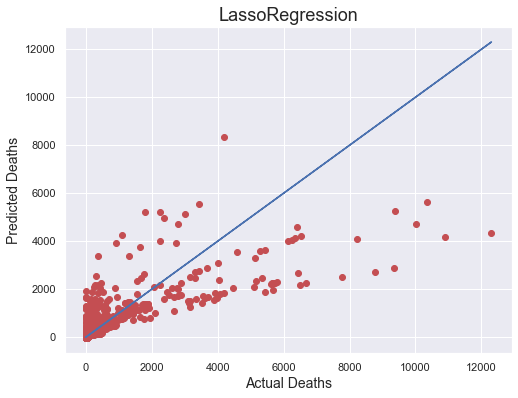

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Deaths",fontsize=14)
plt.ylabel("Predicted Deaths",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [133]:
#DecisionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'mse', 'splitter': 'best'}


In [135]:
dt=DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=2)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

R2 Score: 90.82002491361727
cross val score: -189.7000839146783


In [136]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:-
MeanAbsoluteError: 16.249424791486913
MeanSquaredError: 42781.55006710766
RootMeanSquareError: 206.83701329091866


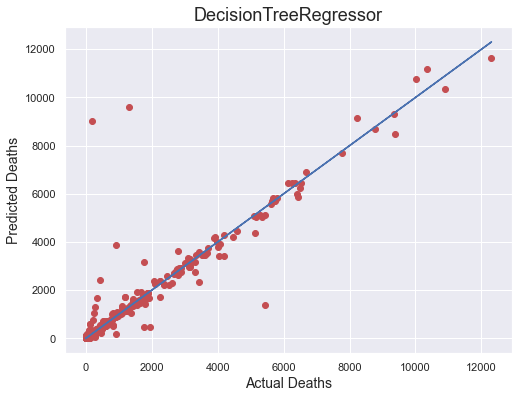

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Deaths",fontsize=14)
plt.ylabel("Predicted Deaths",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [139]:
#AdaboostRegressor

In [140]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
parameters={'base_estimator':[None], 'learning_rate':[1.0,2.0], 'loss':['linear','square','exponential'],'n_estimators':[50,100],'random_state':[50]}
ADB=AdaBoostRegressor()
clf=GridSearchCV(ADB,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 50}


In [146]:
ADB=AdaBoostRegressor(base_estimator=None,learning_rate=1.0,loss='linear',n_estimators=50,random_state=50)
ADB.fit(x_train,y_train)
ADB.score(x_train,y_train)
pred_ADB=ADB.predict(x_test)

ADBS=r2_score(y_test,pred_ADB)
print('R2 Score:',ADBS*100)

ADBSscore=cross_val_score(ADB,x,y,cv=2)
ADBC=ADBSscore.mean()
print('cross val score:',ADBC*100)

R2 Score: 81.94546382147928
cross val score: 21.836111332383062


In [147]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ADB))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ADB))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ADB)))

Error:-
MeanAbsoluteError: 115.27039884896438
MeanSquaredError: 84139.77556491898
RootMeanSquareError: 290.0685704534688


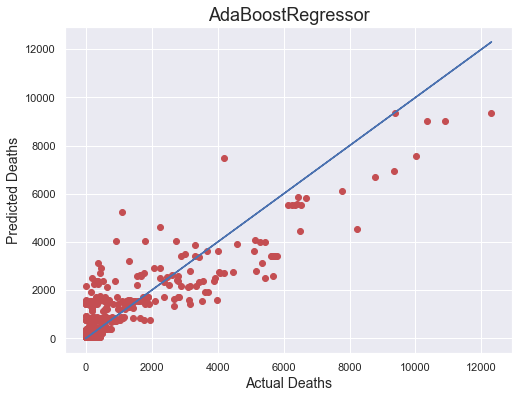

In [149]:
plt.figure(figsize=(8,6))

plt.scatter(x=y_test,y=pred_ADB,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Deaths",fontsize=14)
plt.ylabel("Predicted Deaths",fontsize=14)
plt.title("AdaBoostRegressor",fontsize=18)
plt.show()

In [150]:
#SGD Regressor

In [151]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'alpha': 0.01, 'epsilon': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}


In [152]:
SGD=SGDRegressor(alpha=0.01,epsilon=0.01,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=2).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=63.71827547727036,Cross_Val_score=-1.2892525411140458e+37and difference=1.2892525411140458e+37


In [153]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

Error:-
MeanAbsoluteError: 3.124364239466251e+22
MeanSquaredError: 9.761652328022696e+44
RootMeanSquareError: 3.1243643078269053e+22


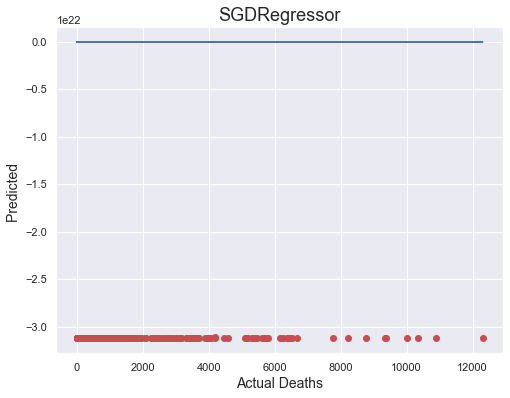

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Deaths",fontsize=14)
plt.ylabel("Predicted ",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [158]:
parameters={"alpha":[0.0001,0.001,0.01,0.1,1,10],"random_state":list(range(20,100))}

from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(Lasso(),parameters,cv=2,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 63.718384072108044


<bound method BaseSearchCV.fit of GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'epsilon': [0.01, 0.1], 'max_iter': [1000],
                         'penalty': ['elasticnet'], 'tol': [0.001]},
             scoring='r2')>

With the help og gridsearchCV we could abserve the model accuracy is not increasing above 63.71%,we need to collect more data for more accuracy

SERIALIZATION

In [160]:
import joblib

In [161]:
joblib.dump(GCV.best_estimator_,"corona_project.pkl")

['corona_project.pkl']